## Die kontinuierliche gleichmäßige Verteilung in Python
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Python ermöglicht den Zugriff auf die Gleichverteilung mit den Funktionen `uniform.pmf()`, `uniform.cdf()`, `uniform.ppf()` und `uniform.rvs()`. Wenden Sie die Funktion `dir()` auf diese Funktionen an, um weitere Informationen zu erhalten.

Die Funktion `uniform.rvs()` erzeugt Zufallsabweichungen der Gleichverteilung und wird als `uniform.rvs(loc, loc+scale, size)` geschrieben. Wir können auf einfache Weise $n$ Zufallsstichproben innerhalb eines beliebigen Intervalls erzeugen indem wir die Zahlenwerte für minimalen ($a$) und maximalen Wert ($b$) in `random.uniform(a,b, size)` einsetzen.

In [2]:
u_rvs = np.random.uniform(-1,1,size = 40)
u_rvs

array([-0.60307711, -0.06103022,  0.07722845, -0.36864391,  0.60283994,
       -0.90410511, -0.24227081,  0.0070687 ,  0.45539485,  0.42816964,
       -0.82853032,  0.60696971, -0.86275626, -0.23145788, -0.82993933,
        0.95748138, -0.43300724,  0.9078186 , -0.70494222,  0.6581114 ,
        0.39538408,  0.22908143,  0.74986205, -0.58687926, -0.64964934,
       -0.97522878, -0.16187919, -0.74045852,  0.69134676, -0.0672303 ,
        0.00950409,  0.60457435,  0.90548284,  0.36173502,  0.19839637,
       -0.64934559,  0.5923615 ,  0.93099724, -0.18913194,  0.81668478])

Wir können die Dichtefunktion für $X \sim U(-2 \ $,$ \ 0,8)$ mit Hilfe der Funktion `uniform.rvs()` approximieren und die Ergebnisse als Histogramm darstellen.

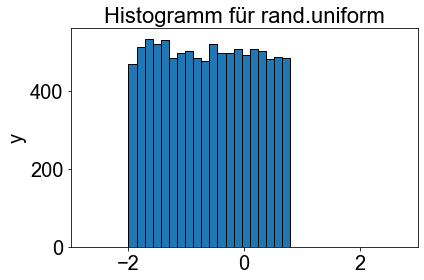

In [4]:
# Erzeuge gleichverteilte werte
u_rvs = np.random.uniform(-2,0.8,size = 10000)

# Plotte Histogramm
fig, ax1 = plt.subplots()
plt.xlim(-3,3)

ax1.set_title('Histogramm für rand.uniform')
ax1.set_ylabel('Wahrscheinlichkeitsdichte')
ax1.set_ylabel('y')
ax1.hist(u_rvs, bins= 20,edgecolor = 'k')

fig.tight_layout()

plt.show()

Außerdem stellen wir sowohl das Dichtehistogramm von oben als auch die gleichmäßige Wahrscheinlichkeitsverteilung für das Intervall $[-2 \ $,$ \ 0,8]$ dar, indem wir die Funktion `uniform.pdf()` anwenden.

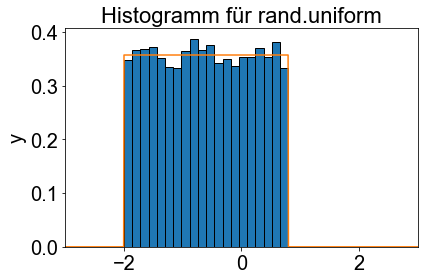

In [5]:
# Erzeuge x-werte
x = np.linspace(-3,3,num = 1000)

# Erzeuge gleichverteilte werte
u_rvs = uniform.rvs(-2,2.8,size = 10000)

uni_mean = np.mean(u_rvs)
uni_std = np.std(u_rvs)

# Plotte Histogramm und uniforme pdf
fig, ax1 = plt.subplots()
plt.xlim(-3,3)

ax1.set_title('Histogramm für rand.uniform')
ax1.set_ylabel('Wahrscheinlichkeitsdichte')
ax1.set_ylabel('y')
ax1.hist(u_rvs, bins= 20,edgecolor = 'k',density = True)

#ax2 = ax1.twinx()   
ax1.plot(x,uniform.pdf(x,-2,2+max(u_rvs)))
ax1.tick_params(axis='y')

fig.tight_layout()

plt.show() 

In [6]:
unif_mean = (-2+0.6)/2
unif_mean

-0.7

Die Abbildung zeigt, dass unsere $10.000$ Stichproben, die nach dem Zufallsprinzip aus einer Gleichverteilung gezogen wurden (Histogramm), sich der Gleichverteilung $X \sim U(-2 \ $,$ \ 0,8)$ (Liniendiagramm).

Außerdem können wir die Funktion `uniform.cdf()` verwenden, um die Fläche unter der Kurve für einen bestimmten Schwellenwert zu berechnen, oder wir können die Funktion `uniform.ppf()` verwenden, um einen Schwellenwert für eine bestimmte Wahrscheinlichkeit zurückzugeben.

### Übung

Betrachten wir die gleichmäßige Wahrscheinlichkeitsverteilung, die durch $X \sim U(-3 \ $,$ \ 5,5)$ gegeben ist.

**Frage 1**

Wie lautet der Mittelwert $\mu$ für die gegebene Gleichverteilung.

In [118]:
unif_mean = (-3+5.5)/2
unif_mean

1.25

Der Mittelwert $\mu$ für die durch $X \sim U(-3 \ $,$ \ 5,5)$ gegebene gleichmäßige Wahrscheinlichkeitsverteilung beträgt $1,25$.

**Frage 2**

Welcher Wert von $x$ entspricht dem Wert, der die gegebene Gleichverteilung in zwei gleiche Teile teilt, oder anders ausgedrückt: $P(X \lt ?)=0,5$.

In [85]:
p_50 = uniform.ppf(0.5,-3,8.5)
p_50

1.25

Das ist überhaupt keine Überraschung. Der Wert von $x$, der die Gleichverteilung in zwei gleiche Teile teilt, beträgt $1,25$ und ist somit gleich $\mu$.

**Frage 3**

Angenommen, die obige Verteilung beschreibt ein physikalisches Phänomen. Wie groß ist die Wahrscheinlichkeit, dass bei einer Messung des physikalischen Prozesses, der das Phänomen bestimmt, ein Wert $ \ge 4$ gemessen wird, oder anders ausgedrückt: $P(X \ge 4)$. Aufgrund des Charakters einer Gleichverteilung ist die Messung eines beliebigen Wertes innerhalb des Intervalls $[-3 \ $,$ \ 5,5]$ gleich wahrscheinlich ist.

Wir werden diese Frage auf zwei Arten lösen, numerisch und analytisch. Um die Frage numerisch zu lösen, müssen wir zunächst ein Experiment durchführen. Wir wiederholen unsere Messung eine große Anzahl von Malen und zählen dann, wie oft wir einen Wert $\ge 4$ registriert haben
. Dank der Leistungsfähigkeit von Python und dem integrierten Zufallszahlengenerator `uniform.rvs()` für gleichmäßig verteilte Daten) ist die Wiederholungsaufgabe sehr einfach, allerdings sollte man sich darüber im Klaren sein, dass in realen Anwendungen oft nur eine sehr begrenzte Anzahl von Messungen verfügbar ist.

In [122]:
# Erzeuge gleichverteilte Zufallsvariablen und Variable count
u_rvs = uniform.rvs(-3,8.5,size = 10000)
count=0

# Zähle Werte größer gleich 4
for i in u_rvs:
    if i>= 4:
        count += 1

#Dividiere durch Gesamtanzahl der Werte
count= count/len(u_rvs)
count

0.1768

Die Ergebnisse zeigen, dass etwa $18 \%$ der Messungen Werte $\ge 4$ ergeben.

Zweitens, um die Frage analytisch zu lösen, verwenden wir die kumulative Wahrscheinlichkeitsdichtefunktion, die in Python für gleichmäßige Verteilungen durch die Funktion `uniform.cdf()` implementiert ist. 
Wir interessieren uns also für die Fläche unter der Kurve bis zum Wert von $x=4$.

In [108]:
1-uniform.cdf(4,-3,8.5)

0.17647058823529416

Der analytische Ansatz ergibt ein Ergebnis von $0,1764706$ oder anders ausgedrückt, mit einer Wahrscheinlichkeit von $17,65 \%$ erhalten wir Werte $\ge 4$, also $P(X \ge 4) \approx 0,18$.

Es ist offensichtlich, dass beide Ansätze sehr ähnliche Ergebnisse liefern. Es ist jedoch zu beachten, dass das Ergebnis des numerischen Ansatzes eine Annäherung an das analytische Ergebnis darstellt. Bedenken Sie, dass die Qualität einer solchen Annäherung sehr stark von der Anzahl der Zufallsvariablen abhängt, aus denen die Stichprobe besteht, in unserem Fall von der Anzahl der Messungen.